# 02.Neural Network classification with Pytorch

Classification is a problem of predicting whether something is one thing or another( there can be mutiple things as the options)


## 1.Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise= 0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

,count
label,
1,500
0,500


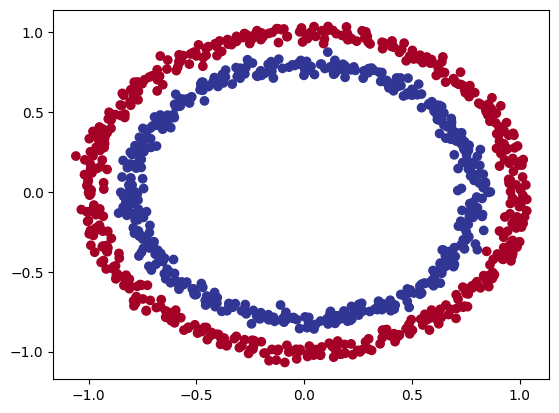

In [7]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: the data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one smaple of X: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one smaple of X: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [11]:

import torch



In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# Turn data inro tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [14]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
#Split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data will be test & 80% will be train)4-
                                                    random_state=42)


In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

1. Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model ( by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Create a training and test loop

In [18]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclass 'nn.Module' (almost all models in PyTorch subclass 'nn.Module')
2. Create 2'nn.Linear()' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the terget 'device'

In [20]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features amd upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    '''
    위에 대신 이거 써도 됨
    self.two_linear_layers= nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )
    '''
  # 3. Define a forward () method that ourlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model calss and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cuda'

In [22]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [23]:
#Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5437,  0.0400],
                      [-0.0061,  0.5064],
                      [-0.3828, -0.5024],
                      [ 0.6086, -0.4540],
                      [ 0.2319,  0.6752]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2316,  0.3866,  0.1072, -0.0724, -0.1857], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3699, -0.4035, -0.0786,  0.4035,  0.3792]], device='cuda:0')),
             ('1.bias', tensor([-0.1746], device='cuda:0'))])

In [25]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape} ")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nfirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n {y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1]) 
Length of test samples: 200, Shape: torch.Size([200, 2])

first 10 predictions: 
tensor([[-0.6389],
        [-0.5959],
        [-0.6160],
        [-0.6460],
        [-0.4005],
        [-0.3759],
        [-0.4255],
        [-0.3734],
        [-0.6251],
        [-0.5906]], device='cuda:0')

First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you untrained_preds

this is problem specific.

For example for regression you might MAE or MSE (mean absolute or mean squaerd error)

For clasification you might want binary cross entropy or categorial cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options

In [26]:
# Setup the loss function
# loss_fn = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input BCELoss
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [27]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model

To train out model, we're going to need to build a training loop:

1. Forwardpass
2. calculate the loss
3. Optimizer zero_grad
4. loss backward
5. optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
our model outputs are going to be raw **logits**.

we can convert these **logits** into predictin probabilities by passing them to some kind of activation function(e.g. sigmoid for binary crossentropy and softmax for multiclass classification).in

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [28]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.6389],
        [-0.5959],
        [-0.6160],
        [-0.6460],
        [-0.4005]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch. sigmoid(y_logits)
y_pred_probs


tensor([[0.3455],
        [0.3553],
        [0.3507],
        [0.3439],
        [0.4012]], device='cuda:0')

In [31]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

For our prdiction probability values, we need to perform a range-style rounding on them:
* 'y_pred_probs' >=0.5, y=1(class 1)
* 'y_pred_probs' <0.5, y=0 (class 0)

In [32]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and test loop

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1.Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs ->pred labels

  #2. Caculate the loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),  #nn.BCELoss expects prediction probabilities as input
  #               y_train)
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  #5. Optimizer step( gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch. inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happenin'
    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc:{acc:.2f}| Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.72864, Acc:50.00| Test loss: 0.72617, test acc: 50.00
Epoch: 10 | Loss: 0.70820, Acc:50.00| Test loss: 0.70760, test acc: 50.00
Epoch: 20 | Loss: 0.69993, Acc:50.00| Test loss: 0.70014, test acc: 50.00
Epoch: 30 | Loss: 0.69635, Acc:50.00| Test loss: 0.69700, test acc: 50.00
Epoch: 40 | Loss: 0.69473, Acc:42.25| Test loss: 0.69564, test acc: 41.50
Epoch: 50 | Loss: 0.69395, Acc:46.62| Test loss: 0.69505, test acc: 44.50
Epoch: 60 | Loss: 0.69356, Acc:48.75| Test loss: 0.69480, test acc: 46.00
Epoch: 70 | Loss: 0.69335, Acc:48.38| Test loss: 0.69469, test acc: 49.00
Epoch: 80 | Loss: 0.69323, Acc:48.62| Test loss: 0.69466, test acc: 48.50
Epoch: 90 | Loss: 0.69316, Acc:49.38| Test loss: 0.69464, test acc: 48.50


## 4. Make predictions and evaluatie

From the metrics it looks like our model isn't lerning anything...

so to inspect it let's make some predictions and make them visual!

In other words, "visualize"

To do so we're going to import a function  called "plot_decisioin_boundary()"

In [34]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo( if it's not already download)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exits, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


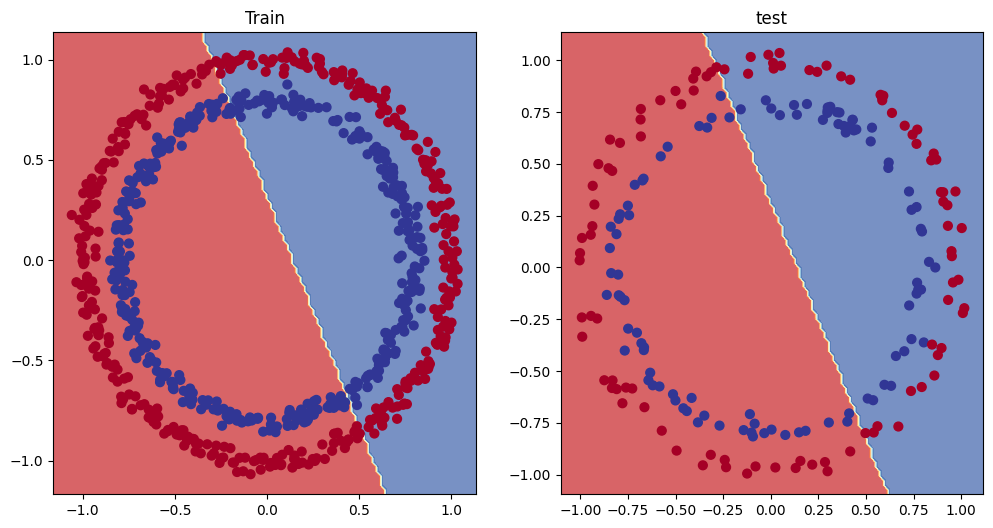

In [35]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These opotions are all from a model's perspective because they deal directly with the model,rather than the data.

And because these options are all values we ( as machine learning engineers and data scientists ) can change, they are referred as **hyperparemeter**

Let's try and improve our model by:
* Adding more hidden units -> 10
* Increase the number of layers: 2 ->3
* Increase the number of epochs: 100 ->1000

In [36]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [37]:
class CircleModeV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverage

model_1 = CircleModeV1().to(device)
model_1

CircleModeV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [39]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create a optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [40]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Training loop
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimzer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch. inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}%| Test loss : {test_loss:.5f}, Test acc : { test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Acc: 50.88%| Test loss : 0.69261, Test acc : 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38%| Test loss : 0.69379, Test acc : 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12%| Test loss : 0.69437, Test acc : 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62%| Test loss : 0.69458, Test acc : 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12%| Test loss : 0.69465, Test acc : 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00%| Test loss : 0.69467, Test acc : 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00%| Test loss : 0.69468, Test acc : 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00%| Test loss : 0.69468, Test acc : 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00%| Test loss : 0.69468, Test acc : 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00%| Test loss : 0.69468, Test acc : 46.00%


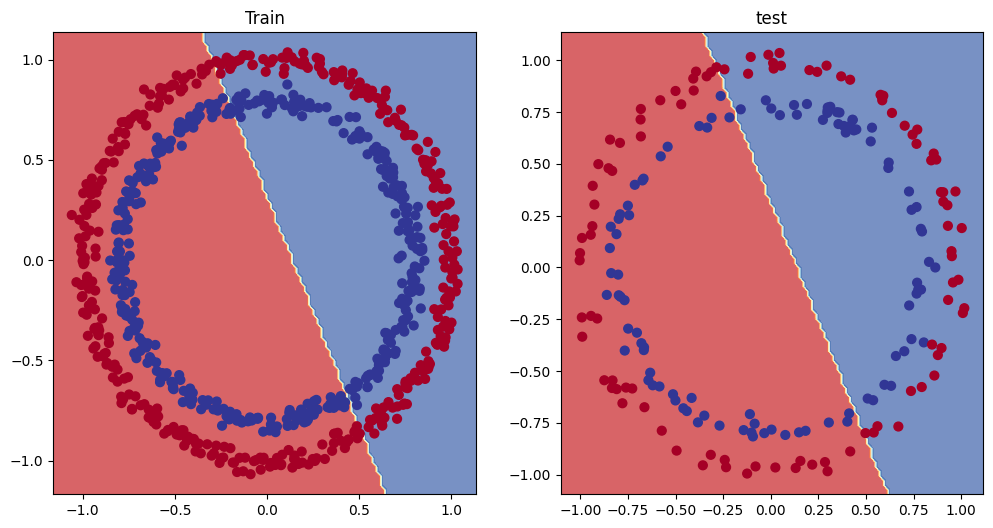

In [41]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller probelm

In [42]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [43]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

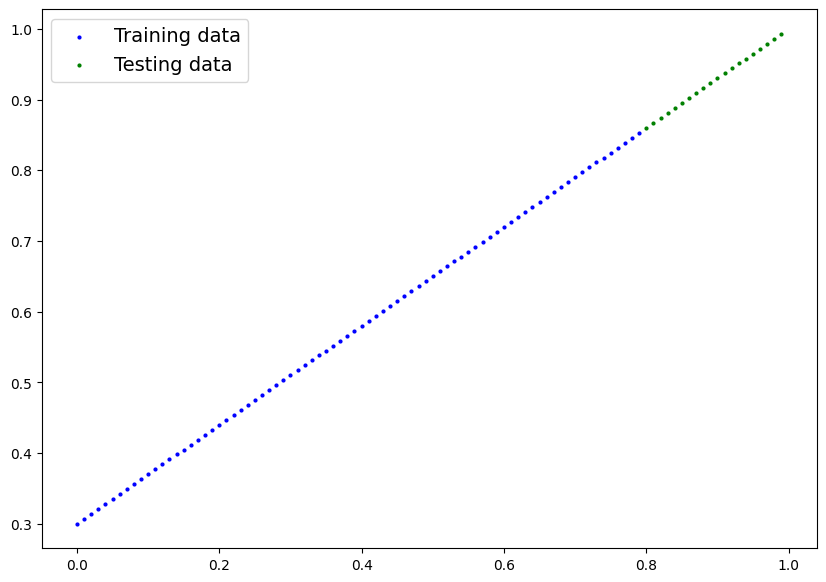

In [44]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [45]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### 5.2 Adjusting 'model_1' to fit a straight line


In [46]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features =1, out_features=10),
    nn.Linear(in_features =10, out_features=10),
    nn.Linear(in_features =10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)


In [48]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the numberof epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  #print out
  if epoch % 100 == 0 :
    print(f"epoch: {epoch} | Loss: {loss:.5f} | test loss: {test_loss:.5f} ")

epoch: 0 | Loss: 0.75986 | test loss: 0.91103 
epoch: 100 | Loss: 0.02858 | test loss: 0.00081 
epoch: 200 | Loss: 0.02533 | test loss: 0.00209 
epoch: 300 | Loss: 0.02137 | test loss: 0.00305 
epoch: 400 | Loss: 0.01964 | test loss: 0.00341 
epoch: 500 | Loss: 0.01940 | test loss: 0.00387 
epoch: 600 | Loss: 0.01903 | test loss: 0.00379 
epoch: 700 | Loss: 0.01878 | test loss: 0.00381 
epoch: 800 | Loss: 0.01840 | test loss: 0.00329 
epoch: 900 | Loss: 0.01798 | test loss: 0.00360 


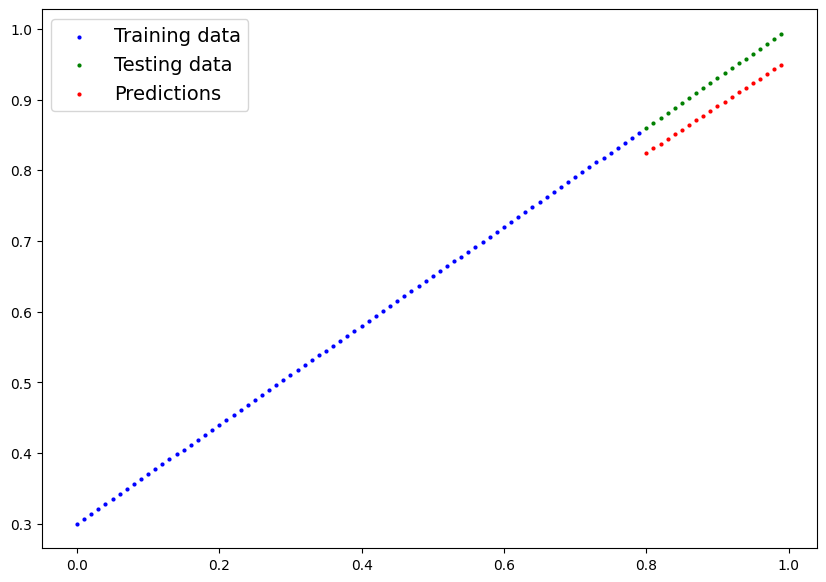

In [49]:
# Turn on evaluatoin mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels= y_train_regression.cpu(),
                 test_data= X_test_regression.cpu(),
                 test_labels= y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data(red and blue circles)

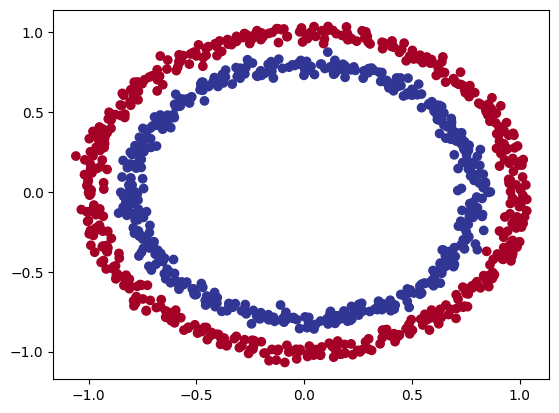

In [50]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y= make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [51]:
# Convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non straight lines

Artificail neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data.

In [52]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Train a model with non-linearity


In [54]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs =1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true= y_train,
                    y_pred = y_pred)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc:{acc:.2f} | test loss : {test_loss:4f} | Test acc : {test_acc}")

Epoch: 0 | Loss: 0.6929, Acc:50.00 | test loss : 0.693188 | Test acc : 50.0
Epoch: 100 | Loss: 0.6912, Acc:52.88 | test loss : 0.691024 | Test acc : 52.5
Epoch: 200 | Loss: 0.6898, Acc:53.37 | test loss : 0.689396 | Test acc : 55.00000000000001
Epoch: 300 | Loss: 0.6879, Acc:53.00 | test loss : 0.687232 | Test acc : 56.00000000000001
Epoch: 400 | Loss: 0.6852, Acc:52.75 | test loss : 0.684115 | Test acc : 56.49999999999999
Epoch: 500 | Loss: 0.6810, Acc:52.75 | test loss : 0.679412 | Test acc : 56.49999999999999
Epoch: 600 | Loss: 0.6751, Acc:54.50 | test loss : 0.672851 | Test acc : 56.00000000000001
Epoch: 700 | Loss: 0.6666, Acc:58.38 | test loss : 0.663216 | Test acc : 59.0
Epoch: 800 | Loss: 0.6516, Acc:64.00 | test loss : 0.647569 | Test acc : 67.5
Epoch: 900 | Loss: 0.6236, Acc:74.00 | test loss : 0.621453 | Test acc : 79.0


### 6.4 Evaluating a model trained with non-linear activation functions

In [55]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

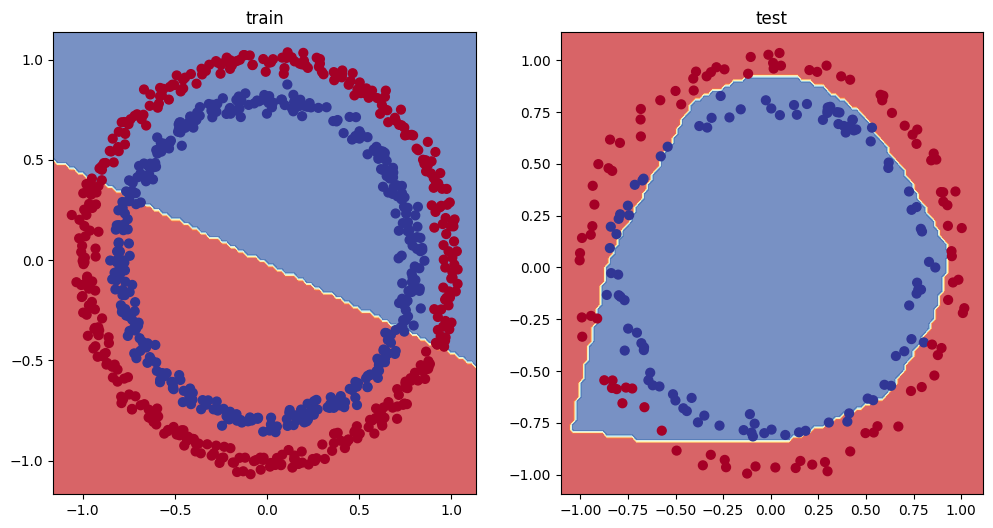

In [56]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks,rather than us teliing the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions

In [57]:
# Create a tensor
A = torch.arange(-10,10,1,dtype= torch.float32)
A.dtype

torch.float32

In [58]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

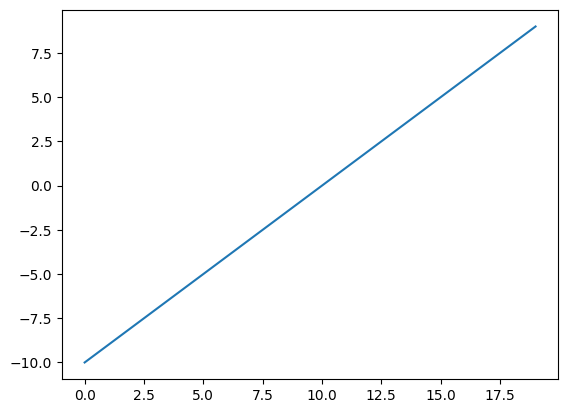

In [59]:
# Visualize the tensor
plt.plot(A)

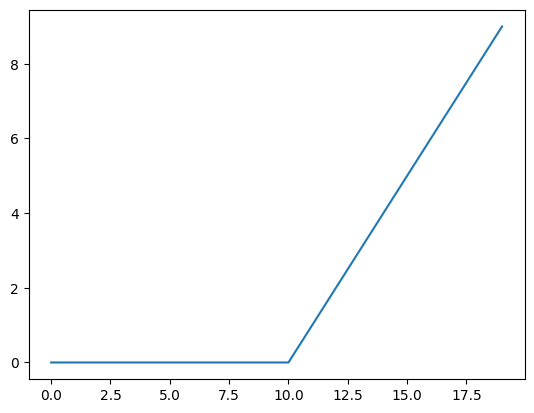

In [60]:
plt.plot(torch.relu(A))

In [61]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)  #input must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

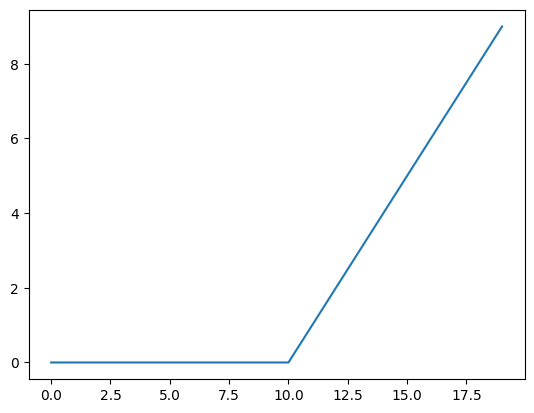

In [62]:
# Plot ReLu activation function
plt.plot(relu(A))

In [63]:
def sigmoid(x):
  return(1/1+torch.exp(-x))


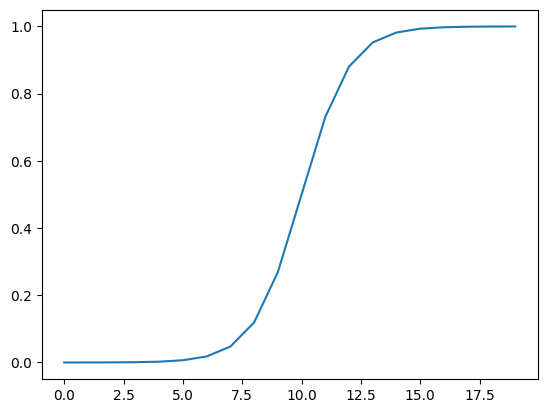

In [64]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multi-class classification

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam)

* Multi-class classification = more than one thing (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

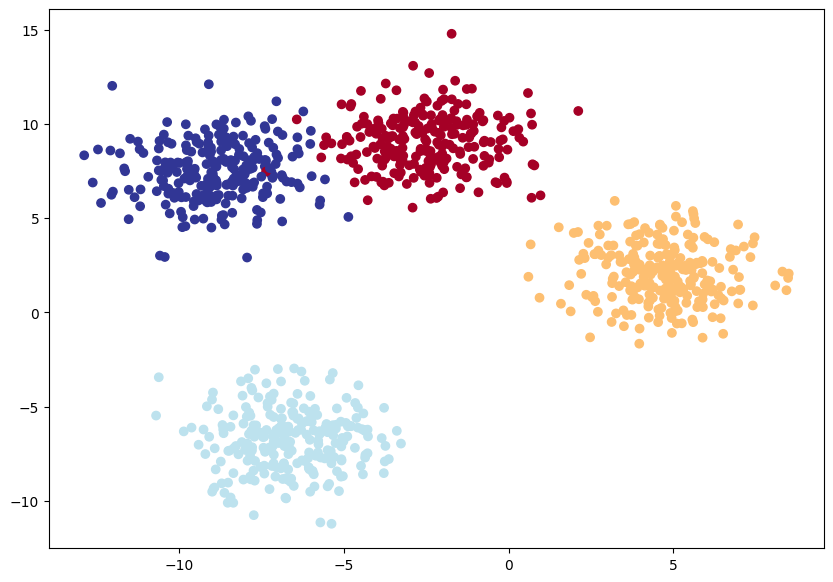

In [65]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features =NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state=RANDOM_SEED)

#Turn data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in pytorch

In [66]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [68]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [69]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameteryou can change

### 8.4 Getting prediction probabilities for a multi-class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities = and then to prediction labels.

Logits (raw output of the model) -> Pred porbs (use torch.softmax) -> Pred labels( take the argmax of the prediction probabilities)

In [70]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:0]

tensor([], device='cuda:0', size=(0, 4))

In [71]:
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [72]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [73]:
y_blob_train.dtype,

(torch.int64,)

In [74]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true= y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc =accuracy_fn(y_true=y_blob_test,
                          y_pred=test_preds)

  ### print out
  if epoch %10 ==0:
    print(f"epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | test loss: {test_loss:.4f} | testacc: {test_acc}")

epoch: 0 | Loss: 1.1588, Acc: 40.38 | test loss: 1.0755 | testacc: 48.0
epoch: 10 | Loss: 0.6448, Acc: 96.75 | test loss: 0.6607 | testacc: 97.5
epoch: 20 | Loss: 0.4254, Acc: 98.50 | test loss: 0.4307 | testacc: 100.0
epoch: 30 | Loss: 0.2529, Acc: 99.12 | test loss: 0.2451 | testacc: 99.5
epoch: 40 | Loss: 0.1123, Acc: 99.25 | test loss: 0.1023 | testacc: 99.5
epoch: 50 | Loss: 0.0663, Acc: 99.25 | test loss: 0.0585 | testacc: 99.5
epoch: 60 | Loss: 0.0507, Acc: 99.25 | test loss: 0.0429 | testacc: 99.5
epoch: 70 | Loss: 0.0430, Acc: 99.25 | test loss: 0.0349 | testacc: 99.5
epoch: 80 | Loss: 0.0384, Acc: 99.25 | test loss: 0.0299 | testacc: 99.5
epoch: 90 | Loss: 0.0352, Acc: 99.25 | test loss: 0.0266 | testacc: 99.5


### 8.6 Making and evaluating predictions with a Pytorch multi-class model

In [75]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [76]:
# GO from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)


In [77]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim= 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

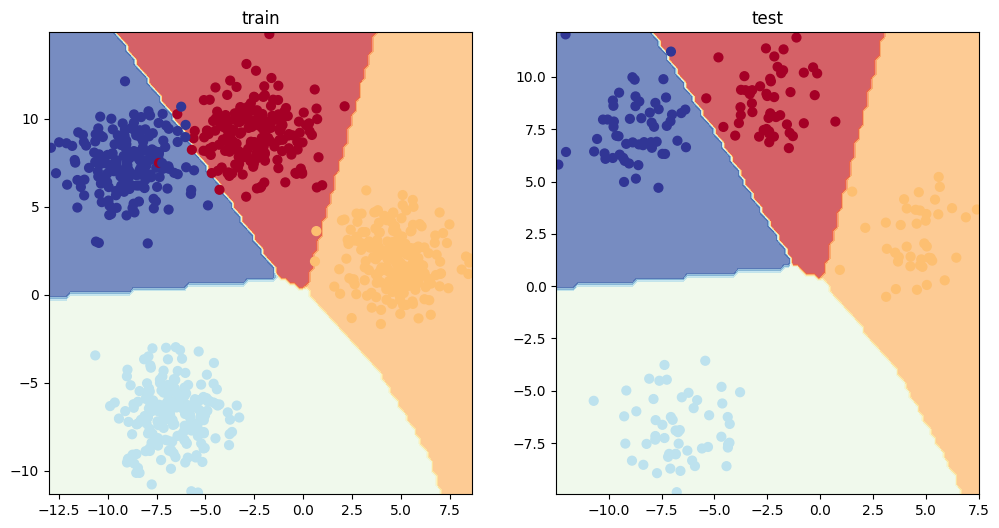

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test,y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html

In [79]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.8 MB/s eta 0:00:00


In [80]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass",num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

9/16 9:57:15

9/17 10:57:55

9/22 12:01:30

9/23 13:57:48